## Sentiment Analysis on Restaurant Reviews
- The notebook deals with the 'Sentiment Analysis of Restaurant Reviews' using different algorithm.

#### About the data
- <b>Data Overview:</b> This is a <b>Sentiment Analysis of Restaurant Reviews</b>.tsv data

### Import required libraries

In [1]:
import pandas as pd  # data processing, csv file I/O (eg. pd.read_csv)
import numpy as np  # linear algebra

### Exploratory Data Analysis

#### Load and Prepare Data

In [2]:
# loading the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
# shape = tuples of array dimention(rows and columns)
df.shape

(1000, 2)

In [4]:
# Returns the label of each column of the DataFrame
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
# view the data
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


#### Data Processing

In [7]:
!pip install nltk

In [8]:
# importing essential libraries for performing natural language processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
!pip install wordcloud

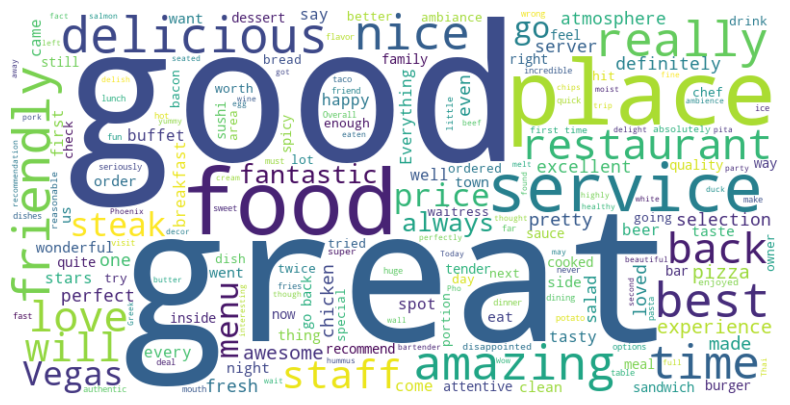

In [10]:
# Positive Reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked']==1, :]
text = ' '.join([text for text in word_cloud['Review']])

# Generate a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

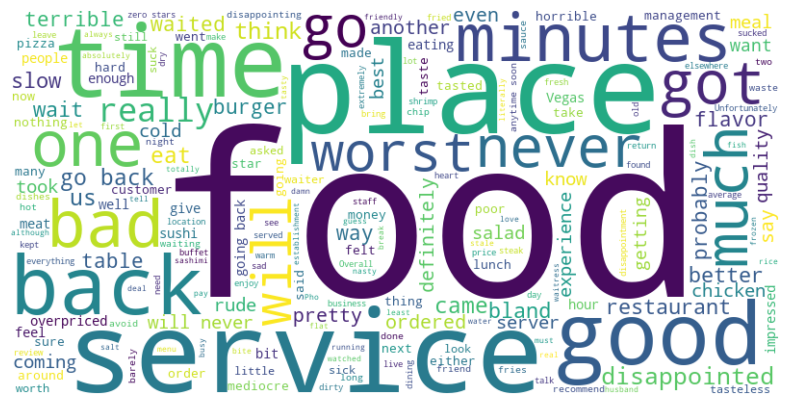

In [11]:
# Negative Reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked']==0, :]
text = ' '.join([text for text in word_cloud['Review']])

# Generate a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):
    
    #cleaning special characters from the reviews
    review = re.sub(pattern='[^A-Za-z]', repl=' ', string=df['Review'][i])
    
    #converting the entire review into lowercase
    review = review.lower()
    
    #tokenizing the review into words
    review_words = review.split()
    
    #removing the stopwords
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    
    #stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    #join the stemmed words
    review = ' '.join(review)
    
    #creating corpus
    corpus.append(review)

In [13]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [14]:
#creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)     # max_features = 1500
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

#### Split Data - (1000,1500)
- In this step, we are going to split the data into two parts(training and testing), so we can train our model on training dataset and test its accuracy on unseen testing dataset

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

# Training(1000,1500)
# 1000*80/100 = 800
# 1000*20/100 = 200

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

<b>Takeaway Points:</b>
- usually we take more and more data in training so it's easy for the model to learn with more data

#### Model Training

In [17]:
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [18]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [19]:
# Accuracy,  Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("----Scores----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

----Scores----
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


In [20]:
# Making of confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[72, 25],
       [22, 81]])

In [22]:
# importing libraries for plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Text(95.72222222222221, 0.5, 'Actual values')

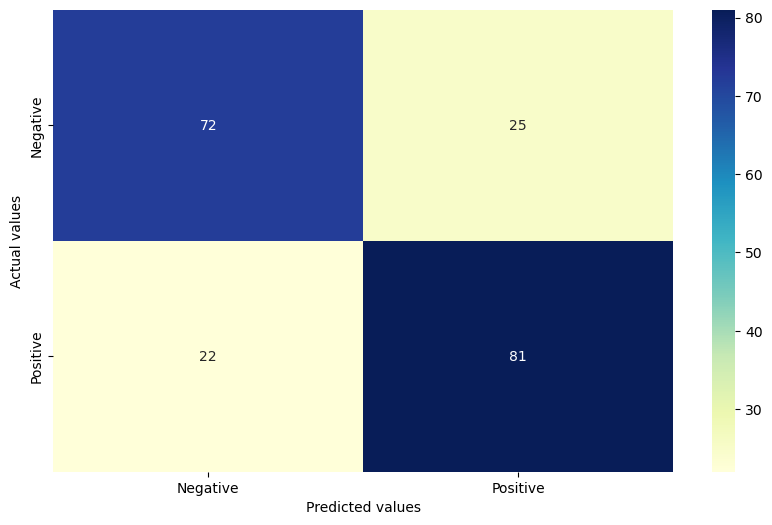

In [23]:
# plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [24]:
# Hyperparameter tuning the Naive Bayes classifier
best_accuracy = 0.0
alpha_val = 0.0

for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(x_train, y_train)
    temp_y_pred = temp_classifier.predict(x_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha = {} is: {}".format(round(i,1), round(score*100,2)))
    
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
        
print("-----------------------------------------")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2), round(alpha_val, 1)))

Accuracy score for alpha = 0.1 is: 78.0
Accuracy score for alpha = 0.2 is: 78.5
Accuracy score for alpha = 0.3 is: 78.0
Accuracy score for alpha = 0.4 is: 78.0
Accuracy score for alpha = 0.5 is: 77.5
Accuracy score for alpha = 0.6 is: 77.5
Accuracy score for alpha = 0.7 is: 77.5
Accuracy score for alpha = 0.8 is: 77.0
Accuracy score for alpha = 0.9 is: 76.5
Accuracy score for alpha = 1.0 is: 76.5
-----------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


### As a result, the best accuracy is 78.5% with alpha value as 0.2

In [25]:
from sklearn import metrics

In [26]:
# Fitting Support Vector Machine to the training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [27]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [28]:
# Making of confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  7],
       [46, 57]])

In [29]:
best_accuracy = metrics.accuracy_score(y_test, y_pred)
print("The best accuracy with SVC is {}%".format(round(best_accuracy*100,2)))

The best accuracy with SVC is 73.5%


### As a result, the best accuracy is 73.5%

In [30]:
# Fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [31]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [32]:
# Making of confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 42],
       [12, 91]])

In [33]:
best_accuracy = metrics.accuracy_score(y_test, y_pred)
print("The best accuracy with GaussianNB is {}%".format(round(best_accuracy*100,2)))

The best accuracy with GaussianNB is 73.0%


### As a result, the best accuracy is 73.0%

In [34]:
# Fitting K-nearest neighbor to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [36]:
# Making of confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 27],
       [56, 47]])

In [37]:
best_accuracy = metrics.accuracy_score(y_test, y_pred)
print("The best accuracy with KNeighborsClassifier is {}%".format(round(best_accuracy*100,2)))

The best accuracy with KNeighborsClassifier is 58.5%


### As a result, the best accuracy is 58.5%

In [38]:
# Fitting linear model to the training setf
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [39]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [40]:
# Making of confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 21],
       [37, 66]])

In [41]:
best_accuracy = metrics.accuracy_score(y_test, y_pred)
print("The best accuracy with LinearRegression is {}%".format(round(best_accuracy*100,2)))

The best accuracy with LinearRegression is 71.0%


### As a result, the best accuracy is 71.0%

#### Prediction

In [42]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl = ' ', string= sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    
    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [43]:
# Predicting values
sample_review = 'The food is really bad'

if predict_sentiment(sample_review):
    print("This is a POSITIVE review")
else:
    print("This is a NEGATIVE review")

This is a NEGATIVE review


In [44]:
# Predicting values
sample_review = 'The food was pretty bad and the service was slow'

if predict_sentiment(sample_review):
    print("This is a POSITIVE review")
else:
    print("This is a NEGATIVE review")

This is a NEGATIVE review


In [45]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing'

if predict_sentiment(sample_review):
    print("This is a POSITIVE review")
else:
    print("This is a NEGATIVE review")

This is a POSITIVE review
